In [ ]:
#!pip install google-play-scraper

# Scrapping the Data from Google Play Store

In [ ]:
#from google_play_scraper import Sort, reviews

#chatgpt_ai_rev = 'com.openai.chatgpt'

#def get_rev(app_id, lang = 'id', count = 20000, sort = Sort.NEWEST, filter_score_with = None, filter_device_with = None, continuation_token = None):
#  try:
#    result, continuation_token = reviews(
#      chatgpt_ai_rev,
#      lang = lang,
#     count = count,
#      sort = sort,
#     filter_score_with = filter_score_with,
#      filter_device_with= filter_device_with,
#      continuation_token = continuation_token
#    )
#    return result, continuation_token
# except Exception as e:
#    print(f'Error: {e}')
#    return None, None

#reviews, continuation_token = get_rev(chatgpt_ai_rev)

#if reviews is not None:
#  print('The Number of Reviews: ', len(reviews))
#  if len(reviews)> 0:
#    print('The First Review: ', reviews[0])

#else:
#  print('No Reviews Found')

# Convert to CSV and Save Data

In [ ]:
"""
import csv

def export_to_csv(review, file_name = 'ChatGPT Review Data.csv'):
  if review:
    filenames = ['Review_id', 'username', 'rating', 'review text', 'date']

    with open(file_name, mode = 'w', newline = '', encoding = 'utf-8') as file:
      writer = csv.DictWriter(file, fieldnames = filenames)
      writer.writeheader()


      for review in reviews:
        writer.writerow({
            'Review_id': review['reviewId'],
            'username': review['userName'],
            'rating': review['score'],
            'review text': review['content'],
            'date': review['at'].strftime('%Y-%m-%d')
        })

    print(f'The data export process has finished and the filename is {file_name}')
  else:
    print('NO REVIEWS FOUND')

export_to_csv(reviews)
"""

"\nimport csv\n\ndef export_to_csv(review, file_name = 'ChatGPT Review Data.csv'):\n  if review:\n    filenames = ['Review_id', 'username', 'rating', 'review text', 'date']\n\n    with open(file_name, mode = 'w', newline = '', encoding = 'utf-8') as file:\n      writer = csv.DictWriter(file, fieldnames = filenames)\n      writer.writeheader()\n\n\n      for review in reviews:\n        writer.writerow({\n            'Review_id': review['reviewId'],\n            'username': review['userName'],\n            'rating': review['score'],\n            'review text': review['content'],\n            'date': review['at'].strftime('%Y-%m-%d')\n        })\n\n    print(f'The data export process has finished and the filename is {file_name}')\n  else:\n    print('NO REVIEWS FOUND')\n\nexport_to_csv(reviews)\n"

In [ ]:
import pandas as pd
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
location = '/content/drive/MyDrive/Machine learning folder/ai sentiment analysis/sentiment_analysis_data.csv'

# the filename change into Chatgpt Review Data

sent_data = pd.read_csv(location)
sent_data.drop(columns = ['sentiment', 'clean text'], inplace = True)
sent_data.head()

Mounted at /content/drive


,Review_id,username,rating,review text,date
0,f6621800-7710-4a84-bc25-9eed73a5eb16,Pengguna Google,5,"canggih sekali, harus disesuaikan dengan keing...",2025-07-14
1,79a0e749-d5eb-46b8-8337-4e662dff1742,Pengguna Google,5,"Aplikasi Ini Sangat Bagus, Bisa Menanyakan Yan...",2025-07-14
2,36831469-81db-486b-b97c-35e78f725ec0,Pengguna Google,5,sangat membantu analisa,2025-07-14
3,2aa2da1d-7d02-4d44-b5bb-39e8e4037db2,Pengguna Google,4,aplikasi nya bagus,2025-07-14
4,866ca4f7-bc9f-4422-8066-46504b647f37,Pengguna Google,5,bagus,2025-07-14


# Sentiment Labeling

In [ ]:
def label_sentiment(rating):
  if rating <= 2:
    return 'negative'
  elif rating == 3:
    return 'neutral'
  else:
    return 'positive'

sent_data['sentiment'] = sent_data['rating'].apply(label_sentiment)
sent_data.head()

,Review_id,username,rating,review text,date,sentiment
0,f6621800-7710-4a84-bc25-9eed73a5eb16,Pengguna Google,5,"canggih sekali, harus disesuaikan dengan keing...",2025-07-14,positive
1,79a0e749-d5eb-46b8-8337-4e662dff1742,Pengguna Google,5,"Aplikasi Ini Sangat Bagus, Bisa Menanyakan Yan...",2025-07-14,positive
2,36831469-81db-486b-b97c-35e78f725ec0,Pengguna Google,5,sangat membantu analisa,2025-07-14,positive
3,2aa2da1d-7d02-4d44-b5bb-39e8e4037db2,Pengguna Google,4,aplikasi nya bagus,2025-07-14,positive
4,866ca4f7-bc9f-4422-8066-46504b647f37,Pengguna Google,5,bagus,2025-07-14,positive


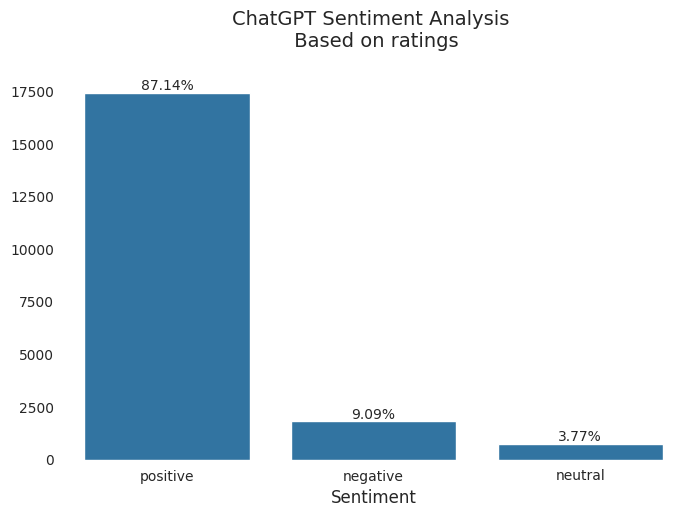

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
sns.set_style("white")

sentiment_count = sent_data['sentiment'].value_counts()

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x = sentiment_count.index, y = sentiment_count.values)
plt.title('ChatGPT Sentiment Analysis \n Based on ratings', fontsize = 14, pad = 20)
plt.xlabel('Sentiment', fontsize = 12)

total = len(sent_data.sentiment)

for i, count in enumerate(sentiment_count.values):
  percentage = f'{100 * count/total:.2f}%'
  ax.text(i, count + 0.10, f'{percentage}', ha = 'center', va = 'bottom', fontsize = 10)

for spine in ax.spines.values():
  spine.set_visible(False)

#plt.savefig('chatgpt_sentiment_ratings.png', dpi=200)
#files.download('chatgpt_sentiment_ratings.png')
plt.show()

In [ ]:
# text length
sent_data['text_length'] = sent_data['review text'].apply(len)
sent_data['word_count'] = sent_data['review text'].str.split().str.len()

print('TEXT CHARACTERISTIC')
text_stats = sent_data[['text_length', 'word_count']].describe()
print(text_stats)

TEXT CHARACTERISTIC
        text_length    word_count
count  20000.000000  20000.000000
mean      31.000850      5.108850
std       51.087388      8.238889
min        1.000000      1.000000
25%        6.000000      1.000000
50%       14.000000      2.000000
75%       32.000000      5.000000
max      500.000000     87.000000


In [ ]:
# text stats based on the sentiment
text_by_sentiment = sent_data.groupby('sentiment')[['text_length','word_count']].mean()
print('\nAverage Text Characteristic based on Sentiment')
print(text_by_sentiment.round(2))


Average Text Characteristic based on Sentiment
           text_length  word_count
sentiment                         
negative         63.30       10.67
neutral          45.98        7.73
positive         26.98        4.42


# Preprocessing

## Cleaning Text (Basic and Advanced Cleaning)

In [ ]:
# Apply basic cleaning
import re
def clean_text_basic(text):
  if pd.isna(text):
    return ""

  # convert to strin if not already
  text = str(text)

  # remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()

  return text

def clean_text_adv(text):
  if pd.isna(text):
    return ""

  text = str(text)

  # convert to lowercase
  text = text.lower()

  # remove punctuation and special characters
  text = re.sub(r'[^\w\s]', ' ', text)

  # remove numbers (optional)
  text = re.sub(r'\d+', '', text)

  # remove extra whitespaces
  text = re.sub(r'\s+', ' ', text).strip()

  # remove extra words
  text = re.sub(r'(\w)\1', r'\1', text)

  # remove emojis

  return text

# Let's see the difference

# Raw review text
print('Raw Review Comment')
print(sent_data['review text'].head().tolist())
print('--------------')

# applied clean basic text
print('Review Comment After Apply Clean Basic Function')
sent_data['clean_basic'] = sent_data['review text'].apply(clean_text_basic)
print(sent_data['clean_basic'].head().tolist())
print('----------------')

# applied clean advanced text
print('Review Comment After Apply Clean Advanced Function')
sent_data['clean_adv'] = sent_data['review text'].apply(clean_text_adv)
print(sent_data['clean_adv'].head().tolist())

Raw Review Comment
['canggih sekali, harus disesuaikan dengan keinginan untuk mendapatkan hasil maksimal', 'Aplikasi Ini Sangat Bagus, Bisa Menanyakan Yang Kita ingin Tau,Asal Berdampak Positif😆', 'sangat membantu analisa', 'aplikasi nya bagus', 'bagus']
--------------
Review Comment After Apply Clean Basic Function
['canggih sekali, harus disesuaikan dengan keinginan untuk mendapatkan hasil maksimal', 'Aplikasi Ini Sangat Bagus, Bisa Menanyakan Yang Kita ingin Tau,Asal Berdampak Positif😆', 'sangat membantu analisa', 'aplikasi nya bagus', 'bagus']
----------------
Review Comment After Apply Clean Advanced Function
['cangih sekali harus disesuaikan dengan keinginan untuk mendapatkan hasil maksimal', 'aplikasi ini sangat bagus bisa menanyakan yang kita ingin tau asal berdampak positif', 'sangat membantu analisa', 'aplikasi nya bagus', 'bagus']


In [ ]:
# Find out the length difference of the text
print(f"\nRaw text length: {sent_data['review text'].str.len().mean():.1f} chars")
print(f"Clean text length: {sent_data['clean_adv'].str.len().mean():.1f} chars")
print(f"Difference: {sent_data['review text'].str.len().mean() - sent_data['clean_adv'].str.len().mean():.1f} chars")



Raw text length: 31.0 chars
Clean text length: 29.8 chars
Difference: 1.2 chars


## Delete Stopword in Data

In [ ]:
# delete emojis, stop words, and unnecessary word in Bahasa
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
stop_words_id = set(stopwords.words('indonesian'))

# add custom stopword for AI app domain
custom_stopwords = {'dan', 'yg', 'atau', 'apk', 'aplikasinya', 'aplikasi', 'juga',
                    'nya', 'tau', 'apknya', 'ai', 'foto','analisa', 'gambar',
                    'chatgpt', 'banget', 'bgt','ya'}

discarded_stopword = {'luar', 'biasa', 'baik', 'lama'}
stop_words_id.update(custom_stopwords)
stop_words_id.discard(discarded_stopword)

# remove stopwords from review
def remove_stopwords(text):
  tokens = word_tokenize(text)
  filtered_tokens = [word for word in tokens if word.lower() not in stop_words_id]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

sent_data['text_no_stopwords'] = sent_data['clean_adv'].apply(remove_stopwords)
print('===STOPWORDS REMOVAL===')
print(sent_data['text_no_stopwords'].head().tolist())
print(f"The length after remove stopwords is : {sent_data['text_no_stopwords'].str.len().mean():.1f} chars")
print(f"Difference: {sent_data['clean_adv'].str.len().mean() - sent_data['text_no_stopwords'].str.len().mean():.1f} chars")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


===STOPWORDS REMOVAL===
['cangih disesuaikan hasil maksimal', 'bagus berdampak positif', 'membantu', 'bagus', 'bagus']
The length after remove stopwords is : 16.8 chars
Difference: 13.0 chars


In [ ]:
sent_data.text_no_stopwords.sample(3)

,text_no_stopwords
521,keren bos ku
15679,gak
15848,mantap


## Tokenization

In [ ]:
# Tokenization
def tokenize_text(text):
  if pd.isna(text) or text == "":
    return []

  # Tokenize using NLTK
  tokens = word_tokenize(text.lower())

  # Filter out single characters and empty strings
  token = [token for token in tokens if len(token) > 1]
  return tokens

sent_data['text_token'] = sent_data['text_no_stopwords'].apply(tokenize_text)
print('===TOKENIZATION===')
for i in range(3):
  print(f"Review {i+1}:")
  print(sent_data['text_token'].iloc[i])

sent_data['length_token'] = sent_data['text_token'].apply(len)
print(f"\nAverage Tokens per tweet: {sent_data['length_token'].mean()}")

===TOKENIZATION===
Review 1:
['cangih', 'disesuaikan', 'hasil', 'maksimal']
Review 2:
['bagus', 'berdampak', 'positif']
Review 3:
['membantu']

Average Tokens per tweet: 2.78005


In [ ]:
sent_data.head()

,Review_id,username,rating,review text,date,sentiment,text_length,word_count,clean_basic,clean_adv,text_no_stopwords,text_token,length_token
0,f6621800-7710-4a84-bc25-9eed73a5eb16,Pengguna Google,5,"canggih sekali, harus disesuaikan dengan keing...",2025-07-14,positive,83,10,"canggih sekali, harus disesuaikan dengan keing...",cangih sekali harus disesuaikan dengan keingin...,cangih disesuaikan hasil maksimal,"[cangih, disesuaikan, hasil, maksimal]",4
1,79a0e749-d5eb-46b8-8337-4e662dff1742,Pengguna Google,5,"Aplikasi Ini Sangat Bagus, Bisa Menanyakan Yan...",2025-07-14,positive,86,12,"Aplikasi Ini Sangat Bagus, Bisa Menanyakan Yan...",aplikasi ini sangat bagus bisa menanyakan yang...,bagus berdampak positif,"[bagus, berdampak, positif]",3
2,36831469-81db-486b-b97c-35e78f725ec0,Pengguna Google,5,sangat membantu analisa,2025-07-14,positive,23,3,sangat membantu analisa,sangat membantu analisa,membantu,[membantu],1
3,2aa2da1d-7d02-4d44-b5bb-39e8e4037db2,Pengguna Google,4,aplikasi nya bagus,2025-07-14,positive,18,3,aplikasi nya bagus,aplikasi nya bagus,bagus,[bagus],1
4,866ca4f7-bc9f-4422-8066-46504b647f37,Pengguna Google,5,bagus,2025-07-14,positive,5,1,bagus,bagus,bagus,[bagus],1


# Exploratory Data Analysis

## Text Post-Cleaning Statistics

In [ ]:
# Text processing statistics
print('Text Processing Statistics:')
print(f"Raw Review Text in Average Length: {sent_data['review text'].str.len().mean()} chars")
print(f"Final Cleaned Average Length: {sent_data['text_no_stopwords'].str.len().mean()} chars")
print(f"Reduction:{((sent_data['review text'].str.len().mean() - sent_data['text_no_stopwords'].str.len().mean())*100/sent_data['review text'].str.len().mean()):.1f}%")


Text Processing Statistics:
Raw Review Text in Average Length: 31.00085 chars
Final Cleaned Average Length: 16.75795 chars
Reduction:45.9%


In [ ]:
# Word count comparison
sent_data['raw_word_count'] = sent_data['review text'].str.split().str.len()
sent_data['final_word_count'] = sent_data['text_no_stopwords'].str.split().str.len()
print(f"\nRaw avg words: {sent_data['raw_word_count'].mean():.1f}")
print(f"Final avg words: {sent_data['final_word_count'].mean():.1f}")


Raw avg words: 5.1
Final avg words: 2.8


In [ ]:
# Check for empty text after cleaning process
empty_post_cleaning = sent_data[sent_data['text_no_stopwords'].str.strip() == '']
print(f"\nNumber of empty posts after cleaning: {len(empty_post_cleaning)}")

if len(empty_post_cleaning) > 0:
  print("Examples of empty posts after cleaning:")
  print(empty_post_cleaning['review text'].head().tolist())


Number of empty posts after cleaning: 849
Examples of empty posts after cleaning:
['baik', '👍', 'luar biasa', 'baik', 'baik']


In [ ]:
# convert date to datetime data
sent_data.rename(columns={'date': 'review_date'}, inplace=True)
sent_data['review_date'] = pd.to_datetime(sent_data['review_date'], format = '%Y-%m-%d')
sent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Review_id          20000 non-null  object        
 1   username           20000 non-null  object        
 2   rating             20000 non-null  int64         
 3   review text        20000 non-null  object        
 4   review_date        20000 non-null  datetime64[ns]
 5   sentiment          20000 non-null  object        
 6   text_length        20000 non-null  int64         
 7   word_count         20000 non-null  int64         
 8   clean_basic        20000 non-null  object        
 9   clean_adv          20000 non-null  object        
 10  text_no_stopwords  20000 non-null  object        
 11  text_token         20000 non-null  object        
 12  length_token       20000 non-null  int64         
 13  raw_word_count     20000 non-null  int64         
 14  final_

## Find Out the Most Frequent Word in Dataset

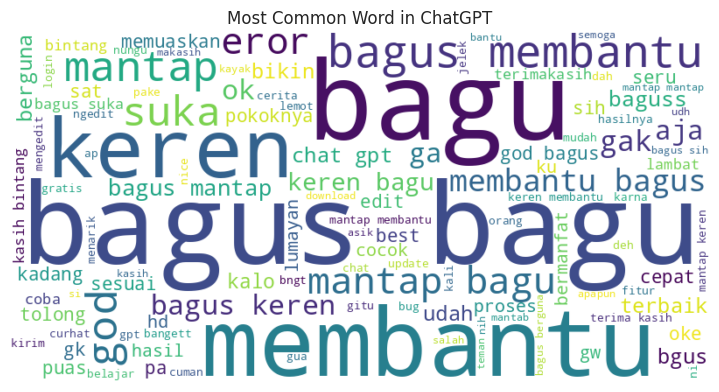

In [ ]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = [word for tokens in sent_data['text_token'] for word in tokens]
fdist = FreqDist(all_words)

text = ' '.join(all_words)
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', min_font_size = 12).generate(text)

plt.figure(figsize = (7,7), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title('Most Common Word in ChatGPT')
#plt.savefig('chatgpt_most_freq_words.png', dpi = 200)
#files.download('chatgpt_most_freq_words.png')
plt.show()

## Negative Reason Frequency Analysis

In [ ]:
# Negative Reason Frequency Analysis
neg_rev = sent_data[sent_data['sentiment'] == 'negative']
print(f"Total negative review: {len(neg_rev)}")

# Overal Negative reasons frequency
neg_rev.sample(3)

Total negative review: 1817


,Review_id,username,rating,review text,review_date,sentiment,text_length,word_count,clean_basic,clean_adv,text_no_stopwords,text_token,length_token,raw_word_count,final_word_count
9044,c2133fd8-5a41-4dd3-9e3b-4eb06a1f649a,Pengguna Google,1,kenapa chat gpt ku nggak bisa dibuka? udah ku ...,2025-07-04,negative,91,17,kenapa chat gpt ku nggak bisa dibuka? udah ku ...,kenapa chat gpt ku ngak bisa dibuka udah ku un...,chat gpt ku ngak dibuka udah ku uninstal trus ...,"[chat, gpt, ku, ngak, dibuka, udah, ku, uninst...",13,17,13
14774,51212ad1-5af2-46c9-ab7c-6c998ed4cf3a,Pengguna Google,1,chatgpt kenapa sekarang tidak bisa dipakai ?,2025-06-30,negative,44,7,chatgpt kenapa sekarang tidak bisa dipakai ?,chatgpt kenapa sekarang tidak bisa dipakai,dipakai,[dipakai],1,7,1
8277,d7d968f2-8787-4cda-b88b-beba65319bba,Pengguna Google,1,saya minta bantuan dari CHATT GBT malah gak di...,2025-07-05,negative,51,9,saya minta bantuan dari CHATT GBT malah gak di...,saya minta bantuan dari chat gbt malah gak dib...,bantuan chat gbt gak dibantu,"[bantuan, chat, gbt, gak, dibantu]",5,9,5


## Time Based Sentiment Trends

sentiment  negative  neutral  positive
day                                   
1             10.67     3.10     86.23
2              9.75     4.63     85.62
3              9.53     3.43     87.03
4             10.76     4.75     84.49
5              7.50     2.96     89.55


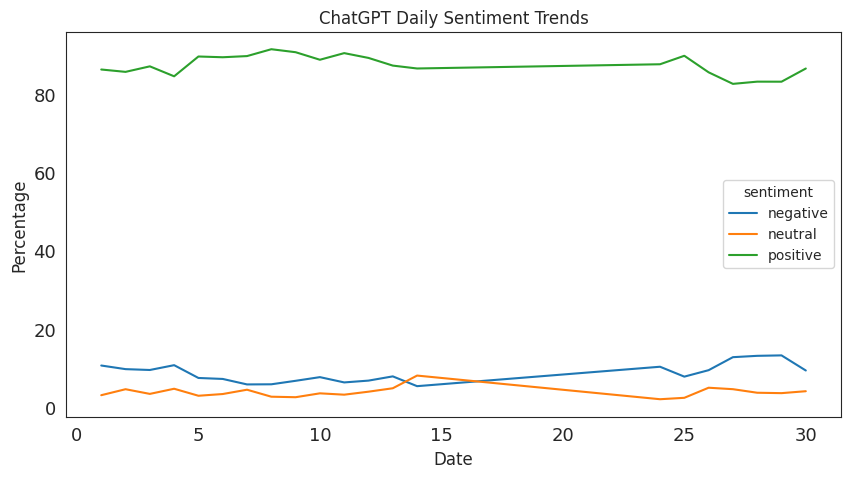

In [ ]:
# time based sentiment trends
sent_data['month'] = sent_data['review_date'].dt.month
sent_data['year'] = sent_data['review_date'].dt.year
sent_data['day'] = sent_data['review_date'].dt.day

# daily sentiment trends
daily_sentiment = sent_data.groupby(['day', 'sentiment']).size().unstack(fill_value=0)
daily_sentiment_pct = daily_sentiment.div(daily_sentiment.sum(axis=1), axis=0)*100
print(daily_sentiment_pct.head(5).round(2))

# create a graph for daily sentiment trends
fig, axs = plt.subplots(figsize = (10,5))
daily_sentiment_pct.plot(kind= 'line',  y = ['negative', 'neutral', 'positive'], title = 'ChatGPT Daily Sentiment Trends', fontsize = '13', ax = axs)
axs.set_xlabel('Date', fontsize = 12)
axs.set_ylabel('Percentage', fontsize = 12)
#plt.savefig('chatgpt_daily_sentiment_trends.png', dpi = 200)
#files.download('chatgpt_daily_sentiment_trends.png')
plt.show()

In [ ]:
# weekly sentiment reviews
sent_data['day_of_week'] = sent_data['review_date'].dt.day_name()
weekly_sentiment = pd.crosstab(index = sent_data['day_of_week'], columns = sent_data['sentiment'], normalize = 'index')*100

# reorder day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sentiment = weekly_sentiment.reindex(day_order)

print('\nSentiment Day of Week (%): ')
print(weekly_sentiment.round(2))


Sentiment Day of Week (%): 
sentiment    negative  neutral  positive
day_of_week                             
Monday           8.02     4.32     87.66
Tuesday          8.98     2.89     88.14
Wednesday        8.45     3.52     88.03
Thursday         8.97     3.88     87.15
Friday           9.90     4.22     85.87
Saturday         9.12     3.57     87.31
Sunday           9.85     3.98     86.17


In [ ]:
# Weekly vs Weekday sentiment
sent_data['day_type'] = sent_data['day_of_week'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')
weekly_sentiment_daytype = pd.crosstab(index = sent_data['day_type'], columns = sent_data['sentiment'], normalize = 'index')*100
print('\nSentiment Day Type (%): ')
print(weekly_sentiment_daytype.round(2))


Sentiment Day Type (%): 
sentiment  negative  neutral  positive
day_type                              
Weekday        8.90     3.77     87.33
Weekend        9.51     3.79     86.71


## Negative Reason Frequency Analysis

## Word Count Distribution

In [ ]:
sent_data.columns

Index(['Review_id', 'username', 'rating', 'review text', 'review_date',
       'sentiment', 'text_length', 'word_count', 'clean_basic', 'clean_adv',
       'text_no_stopwords', 'text_token', 'length_token', 'raw_word_count',
       'final_word_count', 'month', 'year', 'day', 'day_of_week', 'day_type'],
      dtype='object')

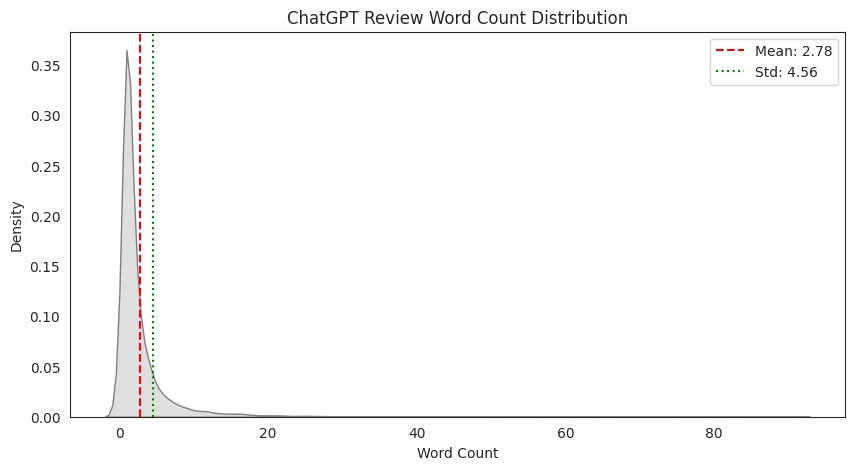

In [ ]:
# visualization after preprocessing (text length and word count)
plt.figure(figsize = (10, 5))
sns.kdeplot(data = sent_data, x = sent_data['length_token'], fill = True, color = 'grey')

# mean and standard deviation
mean = sent_data['length_token'].mean()
std = sent_data['length_token'].std()

# plot mean and std
plt.axvline(mean, color = 'r', linestyle = '--', label =f'Mean: {mean:.2f}')
plt.axvline(std, color = 'g', linestyle = ':', label =f'Std: {std:.2f}')
plt.legend()

plt.xlabel('Word Count')
plt.title('ChatGPT Review Word Count Distribution')

# save the figure
#plt.savefig('chatgpt_review_wordcount_dist.png', dpi = 200)
#files.download('chatgpt_review_wordcount_dist.png')

plt.show()

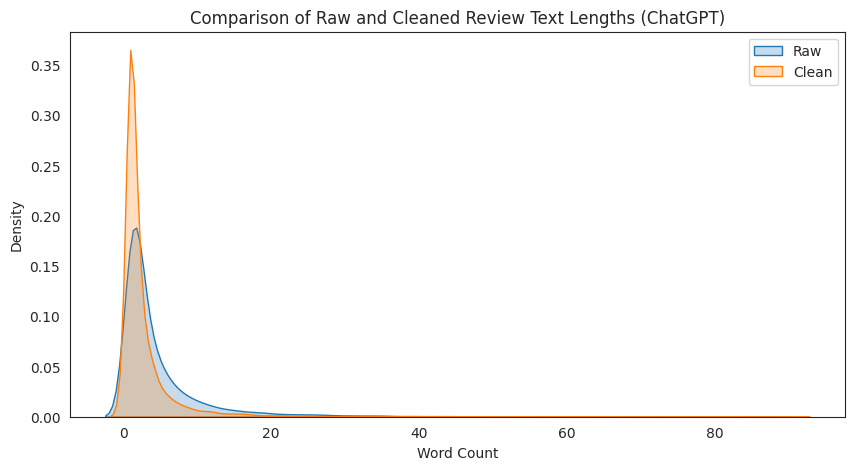

In [ ]:
length_review_df = pd.DataFrame({'length_cleaned_reviews':sent_data.length_token, 'length_raw_review':sent_data['review text'].str.split().str.len()})
raw = length_review_df['length_raw_review']
clean = length_review_df['length_cleaned_reviews']

plt.figure(figsize = (10,5))
sns.kdeplot(data = length_review_df, x = raw, fill = True, label = 'Raw')
sns.kdeplot(data = length_review_df, x = clean, fill = True, label = 'Clean')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.title('Comparison of Raw and Cleaned Review Text Lengths (ChatGPT)')
plt.legend()

# save the figure
#plt.savefig('raw_cleaned_comparison_dist_chatgpt.png', dpi = 300)
#files.download('raw_cleaned_comparison_dist_chatgpt.png')

plt.show()

In [ ]:
# Define the mapping of words to be replaced
word_mapping = {
    'lambat': 'lama',
    'lemot': 'lama',
    'lamban': 'lama'
}
# Apply the replacement to the 'text_no_stopwords' column
sent_data['text_no_stopwords'] = sent_data['text_no_stopwords'].replace(word_mapping, regex=True)

# Display a sample to verify the changes
print("Sample of 'text_no_stopwords' after replacement:")
display(sent_data[sent_data['review text'].str.contains('lambat|lemot|lamban', case=False, na=False)][['review text', 'text_no_stopwords']].head())

Sample of 'text_no_stopwords' after replacement:


,review text,text_no_stopwords
140,lemot,lama
309,lemot,lama
312,"lemot gak berkualitas, banyak di tipu",lama gak berkualitas tipu
421,bagus tp aga lemot dikit,bagus tp aga lama dikit
470,"aplikasinya bagus,, tapi sayang agak lambat ja...",bagus sayang lama fotonya


In [ ]:
# Using FreqDist to see Negative Sentiment Distribution
# create data for neutral and negative
non_pos_df = sent_data[sent_data['sentiment'] != 'positive'].copy()

neg_words = [word for tokens in non_pos_df['text_token'] for word in tokens]
fdist = FreqDist(neg_words)

print('Most Common Words: ')
print(fdist.most_common(10))

Most Common Words: 
[('bagus', 335), ('eror', 316), ('gak', 263), ('ga', 231), ('aja', 144), ('udah', 135), ('tolong', 123), ('chat', 113), ('login', 111), ('bikin', 97)]


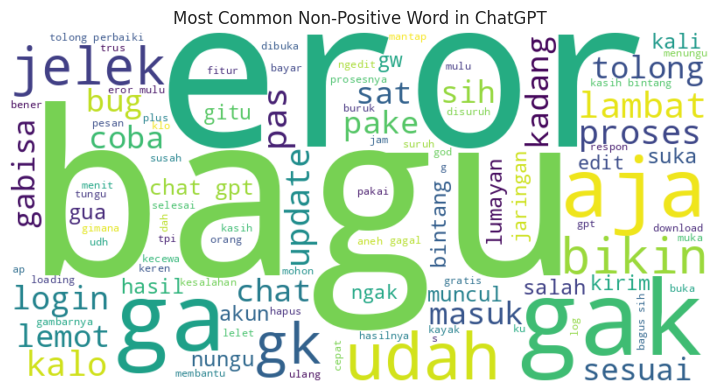

In [ ]:
# Visualize Most Frequent words in negative sentiment
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Visualize wordcloud
text = ' '.join(neg_words)
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white', min_font_size = 10).generate(text)

plt.figure(figsize = (7,7), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title('Most Common Non-Positive Word in ChatGPT')
#plt.savefig('chatgpt_nonpos_words.png', dpi = 200)
#files.download('chatgpt_nonpos_words.png')
plt.show()



# Sentiment Analysis Method

## Method 1: Simple Lexicon-based Approach

In [ ]:
# Define a simple Bahasa Indonesia sentiment lexicon
# This is a very basic example
sentiment_lexicon_id = {
    'bagus': 1, 'baik': 1, 'keren': 1, 'mantap': 1, 'membantu': 1, 'canggih':1, 'terbaik':1,
    'jelek': -1, 'buruk': -1, 'lama': -1, 'error': -1, 'susah': -1, 'eror':-1, 'bug':-1, 'gabisa':-1, 'aneh':-1, 'berbayar':-1, 'bayar':-1, 'memburuk':-1, 'menurun':-1,
    'biasa': 0, 'netral': 0
}

sentiment_lexicon_en = {'good': 1, 'bad':-1, 'best':1, 'worst':-1, 'better':1}

combined_lexicon = {**sentiment_lexicon_id, **sentiment_lexicon_en}

def get_lexicon_sentiment(text):
    if pd.isna(text) or text.strip() == '':
        return 0

    tokens = text.split()
    score = 0
    for token in tokens:
        if token in combined_lexicon:
            score += combined_lexicon[token.lower()]
    return score

# Apply the lexicon-based sentiment analysis to the cleaned text
sent_data['lexicon_sentiment_score'] = sent_data['clean_adv'].apply(get_lexicon_sentiment)

# Categorize the lexicon sentiment scores
def categorize_lexicon_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

sent_data['lexicon_sentiment_category'] = sent_data['lexicon_sentiment_score'].apply(categorize_lexicon_sentiment)

# Display the head of the DataFrame with the new columns
display(sent_data[['review text', 'clean_adv', 'lexicon_sentiment_score', 'lexicon_sentiment_category']].head())

,review text,clean_adv,lexicon_sentiment_score,lexicon_sentiment_category
0,"canggih sekali, harus disesuaikan dengan keing...",cangih sekali harus disesuaikan dengan keingin...,0,neutral
1,"Aplikasi Ini Sangat Bagus, Bisa Menanyakan Yan...",aplikasi ini sangat bagus bisa menanyakan yang...,1,positive
2,sangat membantu analisa,sangat membantu analisa,1,positive
3,aplikasi nya bagus,aplikasi nya bagus,1,positive
4,bagus,bagus,1,positive


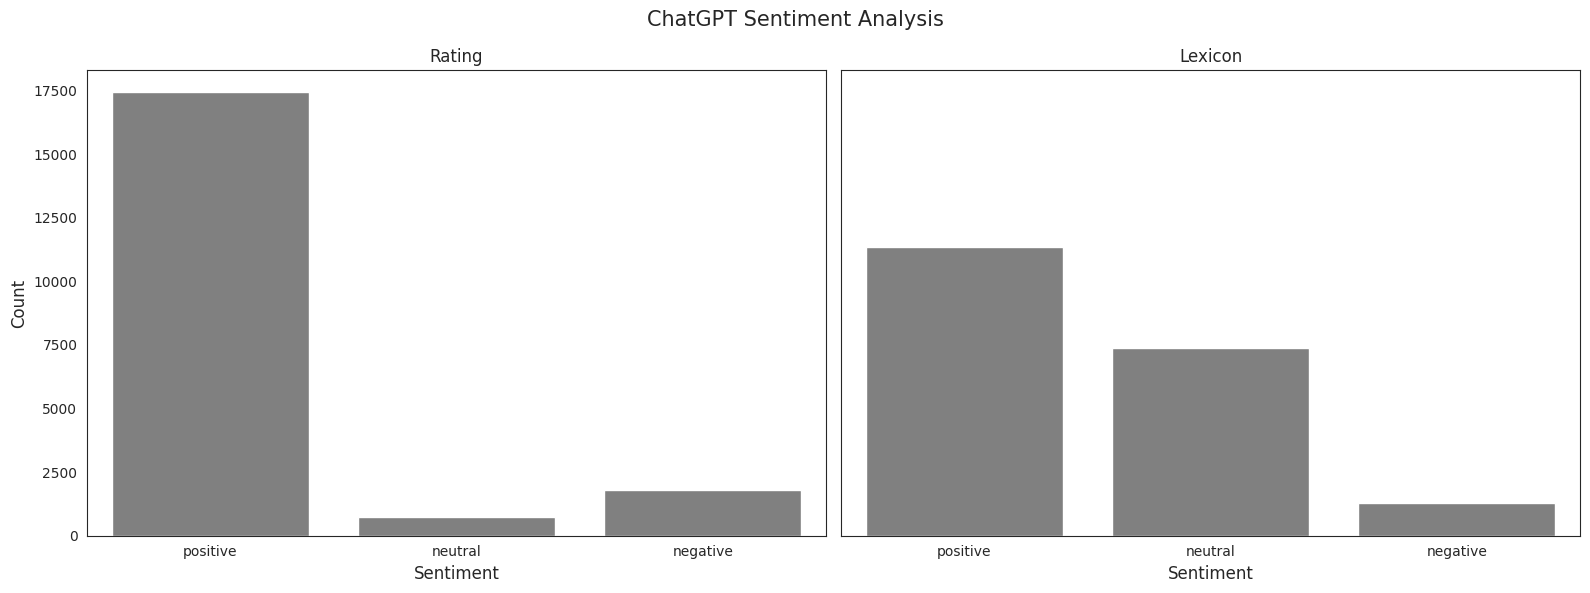

In [ ]:
# Analyze the distribution of lexicon-based sentiment
lexicon_sentiment_counts = sent_data['lexicon_sentiment_category'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

# Plot lexicon-based sentiment distribution
fig, axs = plt.subplots(1,2, figsize = (16,6), sharey = True)

sentiment_order = ['positive', 'neutral', 'negative']

sns.countplot(data = sent_data, x = 'sentiment', order = sentiment_order, ax = axs[0], color = 'grey')
axs[0].set_title('Rating', fontsize = 12)
axs[0].set_xlabel('Sentiment',fontsize = 12)
axs[0].set_ylabel('Count',fontsize = 12)

sns.countplot(data = sent_data, x = 'lexicon_sentiment_category', order = sentiment_order, ax = axs[1], color = 'grey')
axs[1].set_title('Lexicon',fontsize = 12)
axs[1].set_xlabel('Sentiment',fontsize = 12)
axs[1].set_ylabel('Count',fontsize = 12)


plt.suptitle('ChatGPT Sentiment Analysis',fontsize = 15)
plt.tight_layout()
#plt.savefig('chatgpt_lexicon_result.png', dpi = 200)
#files.download("chatgpt_lexicon_result.png")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
lexicon_acc = accuracy_score(sent_data['sentiment'], sent_data['lexicon_sentiment_category'])
print(f"Accuracy: {lexicon_acc * 100}%")

Accuracy: 60.67%


## Method 3: TextBlob Analysis

In [ ]:
# install textblob library
!pip install textblob

# import textblob class
import textblob
from textblob import TextBlob

# Function to get TextBlob sentiment polarity
def get_textblob_polarity(text):
    if pd.isna(text) or text.strip() == '':
        return 0.0
    # Create a TextBlob object and return its polarity
    return TextBlob(text).sentiment.polarity

# Apply the function to the 'clean_adv' column
sent_data['textblob_polarity'] = sent_data['clean_adv'].apply(get_textblob_polarity)

# Display the head of the DataFrame with the new 'textblob_polarity' column
display(sent_data[['review text', 'clean_adv', 'textblob_polarity']].head())

,review text,clean_adv,textblob_polarity
0,"canggih sekali, harus disesuaikan dengan keing...",cangih sekali harus disesuaikan dengan keingin...,0.0
1,"Aplikasi Ini Sangat Bagus, Bisa Menanyakan Yan...",aplikasi ini sangat bagus bisa menanyakan yang...,0.0
2,sangat membantu analisa,sangat membantu analisa,0.0
3,aplikasi nya bagus,aplikasi nya bagus,0.0
4,bagus,bagus,0.0


TextBlob-based Sentiment Distribution:
textblob_sentiment_category
neutral     18712
positive     1176
negative      112
Name: count, dtype: int64


/tmp/ipython-input-2902860353.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=textblob_sentiment_counts.index, y=textblob_sentiment_counts.values, palette='viridis')


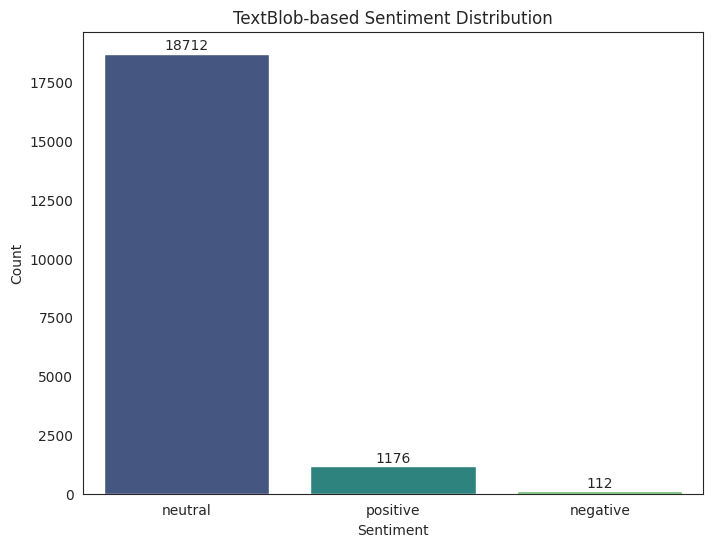

In [ ]:
# Categorize TextBlob polarity scores
def categorize_textblob_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

sent_data['textblob_sentiment_category'] = sent_data['textblob_polarity'].apply(categorize_textblob_sentiment)

# Analyze the distribution of TextBlob-based sentiment
textblob_sentiment_counts = sent_data['textblob_sentiment_category'].value_counts()
print("TextBlob-based Sentiment Distribution:")
print(textblob_sentiment_counts)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot TextBlob-based sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=textblob_sentiment_counts.index, y=textblob_sentiment_counts.values, palette='viridis')
plt.title('TextBlob-based Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add value labels to bars
for i, count in enumerate(textblob_sentiment_counts.values):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

## Method 4: Using Tranformer Indo BERT

In [ ]:
from transformers import pipeline

# Load a pre-trained sentiment analysis model for Bahasa Indonesia
sentiment_analyzer_id = pipeline("sentiment-analysis", model="w11wo/indonesian-bert-base-sentiment-classifier")

# Function to get sentiment polarity for Bahasa Indonesia text
def get_polarity_id(text):
    if not text:
        return 0  # Return neutral polarity for empty text
    result = sentiment_analyzer_id(text)[0]
    if result['label'] == 'positive':
        return result['score']
    elif result['label'] == 'negative':
        return -result['score']
    else:
        return 0

# Apply the function to the 'clean text' column to get polarity scores
sent_data['polarity_id'] = sent_data['clean text'].apply(get_polarity_id)

# Display the DataFrame with the new 'polarity_id' column
display(sent_data.head())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


OSError: w11wo/indonesian-bert-base-sentiment-classifier is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `hf auth login` or by passing `token=<your_token>`

## Score Report of the Three Different Method

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the simple lexicon-based sentiment analysis
print("Evaluation of Simple Lexicon-based Sentiment Analysis:")
simple_lexicon_accuracy = accuracy_score(sent_data['sentiment'], sent_data['lexicon_sentiment_category'])
print(f"Accuracy: {simple_lexicon_accuracy:.4f}")
print("Classification Report:")
print(classification_report(sent_data['sentiment'], sent_data['lexicon_sentiment_category']))

print("-" * 50)

# Evaluate the expanded lexicon-based sentiment analysis
print("Evaluation of Expanded Lexicon-based Sentiment Analysis:")
expanded_lexicon_accuracy = accuracy_score(sent_data['sentiment'], sent_data['expanded_lexicon_sentiment_category'])
print(f"Accuracy: {expanded_lexicon_accuracy:.4f}")
print("Classification Report:")
print(classification_report(sent_data['sentiment'], sent_data['expanded_lexicon_sentiment_category']))

print("-" * 50)

# Evaluate the TextBlob sentiment analysis
print("Evaluation of TextBlob Sentiment Analysis:")
# TextBlob's polarity is continuous, so we'll use the same categorization as before for comparison
sent_data['textblob_sentiment_category_eval'] = sent_data['textblob_polarity'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
)
textblob_accuracy = accuracy_score(sent_data['sentiment'], sent_data['textblob_sentiment_category_eval'])
print(f"Accuracy: {textblob_accuracy:.4f}")
print("Classification Report:")
print(classification_report(sent_data['sentiment'], sent_data['textblob_sentiment_category_eval']))

Evaluation of Simple Lexicon-based Sentiment Analysis:
Accuracy: 0.6067
Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.43      0.50      1817
     neutral       0.05      0.48      0.09       755
    positive       0.97      0.63      0.76     17428

    accuracy                           0.61     20000
   macro avg       0.54      0.51      0.45     20000
weighted avg       0.90      0.61      0.71     20000

--------------------------------------------------
Evaluation of Expanded Lexicon-based Sentiment Analysis:


KeyError: 'expanded_lexicon_sentiment_category'

## TF IDF Filter
Term Frequency-Inverse Document Frequency (TF-IDF) is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

The individual components of TF-IDF are:
1. Term Frequency (TF): This measures how frequently a term appears in a document. A higher TF means the word is more relevant to that specific document.
2. Inverse Document Frequency (IDF): This measures how important a term is across the entire corpus. Words that appear in many documents will have a lower IDF, while words that appear in fewer documents will have a higher IDF.

ow TF and IDF are calculated:
Term Frequency (TF):
There are several ways to calculate TF. A common method is:

$$TF(t, d) = \frac{Number\space of\space times\space term\space t\space appears\space in\space document\space d\space}{Total\space number\space of\space terms\space in\space document\space d\space}$$

Inverse Document Frequency (IDF):
IDF is calculated to measure the rarity of a term across the corpus. A common formula is:

$$IDF(t) = log_e(\frac{Total\space number\space of\space documents}{Number\space of\space documents\space with\space term\space t\space in\space it\space})$$

A small constant (like 1) is often added to the denominator to avoid division by zero if a term does not appear in any document.

How the final TF-IDF score is calculated:
The TF-IDF score is the product of the TF and IDF values:
$$TF-IDF(t, d) = TF(t, d) * IDF(t)$$

The purpose of using TF-IDF in text analysis is to assign weights to terms that reflect their importance within a document relative to the entire corpus. This weighting scheme helps in various tasks such as:
- Highlighting keywords and important terms in a document.
- Ranking documents based on the relevance of their terms to a query in information retrieval systems.
- Providing weighted features for machine learning models used in text classification and clustering.

In [ ]:
# TF IDF calculation

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent_data['clean_adv'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

,_chatgpt,aa,aaa,aaaa,abad,abal,abang,abg,abgus,abidin,...,𝚊𝚙𝚊𝚕𝚊𝚐𝚒,𝚋𝚊𝚗𝚐𝚎𝚝,𝚌𝚞𝚛𝚑𝚊𝚝,𝚕𝚊𝚐𝚒,𝚖𝚊𝚜𝚊𝚕𝚊𝚑,𝚖𝚎𝚖𝚋𝚊𝚗𝚝𝚞,𝚘𝚔𝚎,𝚙𝚊𝚜,𝚜𝚊𝚛𝚊𝚗𝚢𝚊,𝚝𝚛𝚜
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Filtering with TF IDF
---

In [ ]:
# select term for filter (e.g., 'bagus', 'membantu')
selected_term = ['fitur', 'gambar']

# sort the tfidf_df by the selected term's score in descending order
tfidf_sorted = tfidf_df.sort_values(by = selected_term, ascending = False)

# get the indices of the top reviews for the selected term
top_indices = tfidf_sorted.head(10).index

# Display top 10 rows of the sorted tfidf_df
print(f'Top 10 documents wiith the highest TF IDF Score for "{selected_term}" term:')
display(tfidf_sorted.head(10))

# Display the original review text for these top documents
print("\nOriginal review text for the top 10 documents:")
display(sent_data.loc[top_indices, ['clean_adv', 'sentiment']])

Top 10 documents wiith the highest TF IDF Score for "['fitur', 'gambar']" term:


,_chatgpt,aa,aaa,aaaa,abad,abal,abang,abg,abgus,abidin,...,𝚊𝚙𝚊𝚕𝚊𝚐𝚒,𝚋𝚊𝚗𝚐𝚎𝚝,𝚌𝚞𝚛𝚑𝚊𝚝,𝚕𝚊𝚐𝚒,𝚖𝚊𝚜𝚊𝚕𝚊𝚑,𝚖𝚎𝚖𝚋𝚊𝚗𝚝𝚞,𝚘𝚔𝚎,𝚙𝚊𝚜,𝚜𝚊𝚛𝚊𝚗𝚢𝚊,𝚝𝚛𝚜
12746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Original review text for the top 10 documents:


,clean_adv,sentiment
12746,aplikasi ini sangat membantu sekali banyak fit...,positive
4238,sangat bagus fitur foto nya,positive
16407,bagus aplikasi nya sangat berguna banyak fitur...,positive
11754,keren sudah ada fitur gambarnya,positive
18985,sangat puas tingkatkan lagi fitur nya,positive
6983,bagus banget dan masih banyak fitur lainya,positive
13308,ga ada fitur telanjang,negative
1942,fitur yang bagus dan percakapan yang bagus,positive
7796,saya pakai chatgpt untuk bikin apa aja tapi ad...,positive
3622,fitur untuk membuat gambar di gratis mohon,positive


## LSTM

In [ ]:
sent_data.columns

Index(['Review_id', 'username', 'rating', 'review text', 'review_date',
       'sentiment', 'text_length', 'word_count', 'clean_basic', 'clean_adv',
       'text_no_stopwords', 'text_token', 'length_token', 'raw_word_count',
       'final_word_count', 'month', 'year', 'day', 'day_of_week', 'day_type',
       'lexicon_sentiment_score', 'lexicon_sentiment_category',
       'textblob_polarity', 'textblob_sentiment_category'],
      dtype='object')

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer

texts = sent_data['text_no_stopwords'].astype(str).values
labels = sent_data['sentiment'].map({'positive':1, 'neutral':0, 'negative':0}).values

# tokenize and pad
vocab_size = 200
max_length = 50
tokenizer = Tokenizer(num_words = vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequence = pad_sequences(sequences, maxlen=max_length)

padded_sequence

array([[ 0,  0,  0, ...,  1, 44,  1],
       [ 0,  0,  0, ...,  2,  1,  1],
       [ 0,  0,  0, ...,  0,  0,  3],
       ...,
       [ 0,  0,  0, ...,  0,  0, 43],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  2]], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequence, labels, test_size = 0.2, random_state = 42)

for i in range(5):
  print(f"Review {i+1}")
  print(f"Raw Review: {texts[i]}")
  print(f"Tokenize Sequence (first 10 tokens): {sequences[i][:10]}")
  print(f"Padded Sequence (first 10 values): {padded_sequence[i][:10]}")
  sentiment = 'positive' if labels[i] == 1 else 'negative'
  print(f"Label (Encoded): {labels[i]} ({sentiment})")
  print("-"*100)

Review 1
Raw Review: cangih disesuaikan hasil maksimal
Tokenize Sequence (first 10 tokens): [185, 1, 44, 1]
Padded Sequence (first 10 values): [0 0 0 0 0 0 0 0 0 0]
Label (Encoded): 1 (positive)
----------------------------------------------------------------------------------------------------
Review 2
Raw Review: bagus berdampak positif
Tokenize Sequence (first 10 tokens): [2, 1, 1]
Padded Sequence (first 10 values): [0 0 0 0 0 0 0 0 0 0]
Label (Encoded): 1 (positive)
----------------------------------------------------------------------------------------------------
Review 3
Raw Review: membantu
Tokenize Sequence (first 10 tokens): [3]
Padded Sequence (first 10 values): [0 0 0 0 0 0 0 0 0 0]
Label (Encoded): 1 (positive)
----------------------------------------------------------------------------------------------------
Review 4
Raw Review: bagus
Tokenize Sequence (first 10 tokens): [2]
Padded Sequence (first 10 values): [0 0 0 0 0 0 0 0 0 0]
Label (Encoded): 1 (positive)
----------

In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(LSTM(64, dropout=0.3, recurrent_dropout = 0.3, kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.2, batch_size = 128)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 294ms/step - accuracy: 0.8597 - loss: 0.5215 - val_accuracy: 0.8778 - val_loss: 0.3409
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 268ms/step - accuracy: 0.8841 - loss: 0.3186 - val_accuracy: 0.9056 - val_loss: 0.2688
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 223ms/step - accuracy: 0.9091 - loss: 0.2584 - val_accuracy: 0.9175 - val_loss: 0.2512
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 237ms/step - accuracy: 0.9152 - loss: 0.2462 - val_accuracy: 0.9156 - val_loss: 0.2473
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.9187 - loss: 0.2410 - val_accuracy: 0.9175 - val_loss: 0.2438
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 128ms/step - accuracy: 0.9181 - loss: 0.2410 - val_accuracy: 0.9153 - val_loss: 0.2446
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - accuracy: 0.9174 - loss: 0.2356 - val_accuracy: 0.9147 - val_loss: 0.2445
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.9183 - loss: 0

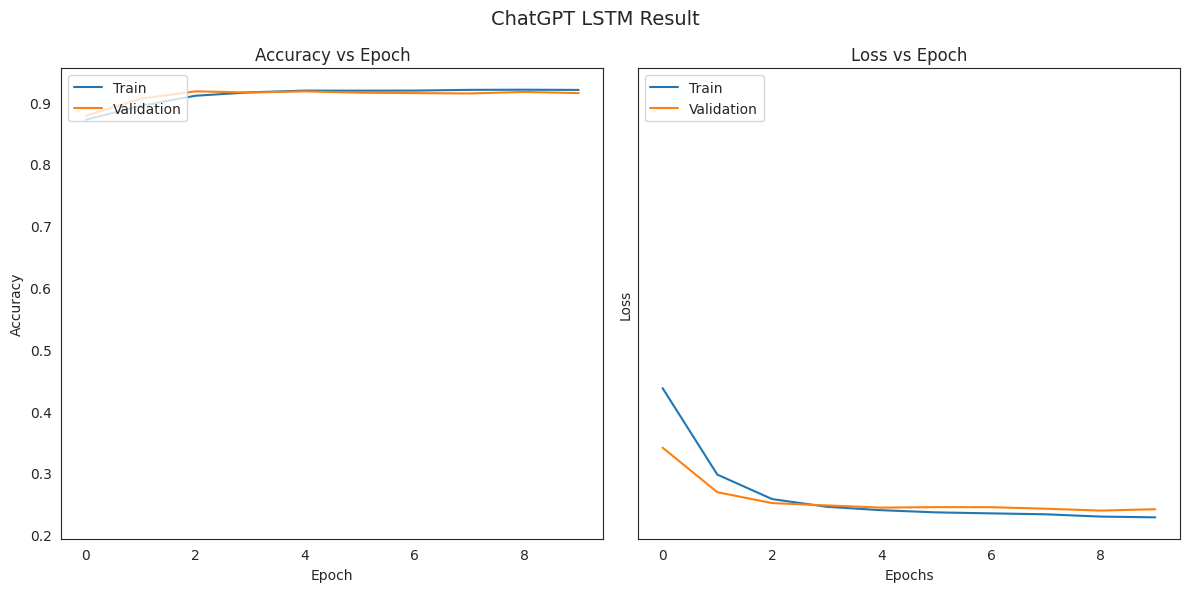

In [ ]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(1,2, figsize = (12,6), sharey = True)

# accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Accuracy vs Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Validation'], loc = 'upper left')


# plot training and validaton of loss value
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Loss vs Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Validation'], loc = 'upper left')

plt.suptitle('ChatGPT LSTM Result', fontsize = 14)
fig.tight_layout()
#plt.savefig('chatgpt_lstm_result.png', dpi = 300)
#files.download('chatgpt_lstm_result.png')
plt.show()

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9183 - loss: 0.2337
Test Loss: 0.2435
Test Accuracy: 0.9128


In [ ]:
# save the model
import os
save_dir = "/content/drive/MyDrive/Machine learning folder/ai sentiment analysis"
os.makedirs(save_dir, exist_ok = True)

lstm_model_path = os.path.join(save_dir, 'lstm_chatgpt.keras')
model.save(lstm_model_path)
print(f"LSTM model saved to:{lstm_model_path}")

LSTM model saved to:/content/drive/MyDrive/Machine learning folder/ai sentiment analysis/lstm_chatgpt.keras


## Bi LSTM

In [48]:
from tensorflow.keras.layers import Bidirectional, Embedding, LSTM, Dense

model_bi = Sequential()
model_bi.add(Embedding(vocab_size, 128))
model_bi.add(Bidirectional(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2, kernel_regularizer =l2(0.001))))
model_bi.add(Dense(1, activation = 'sigmoid'))

model_bi.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_bi.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
history_bi = model_bi.fit(X_train, y_train, epochs = 10, validation_split = 0.2, batch_size = 128)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 535ms/step - accuracy: 0.8563 - loss: 0.6287 - val_accuracy: 0.8750 - val_loss: 0.3582
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 311ms/step - accuracy: 0.8859 - loss: 0.3249 - val_accuracy: 0.9134 - val_loss: 0.2658
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - accuracy: 0.9162 - loss: 0.2567 - val_accuracy: 0.9131 - val_loss: 0.2546
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 223ms/step - accuracy: 0.9149 - loss: 0.2445 - val_accuracy: 0.9153 - val_loss: 0.2463
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 293ms/step - accuracy: 0.9154 - loss: 0.2379 - val_accuracy: 0.9147 - val_loss: 0.2452
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.9193 - loss: 0.2337 - val_accuracy: 0.9162 - val_loss: 0.2415
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 235ms/step - accuracy: 0.9225 - loss: 0.2218 - val_accuracy: 0.9156 - val_loss: 0.2410
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 238ms/step - accuracy: 0.9178 - loss: 0

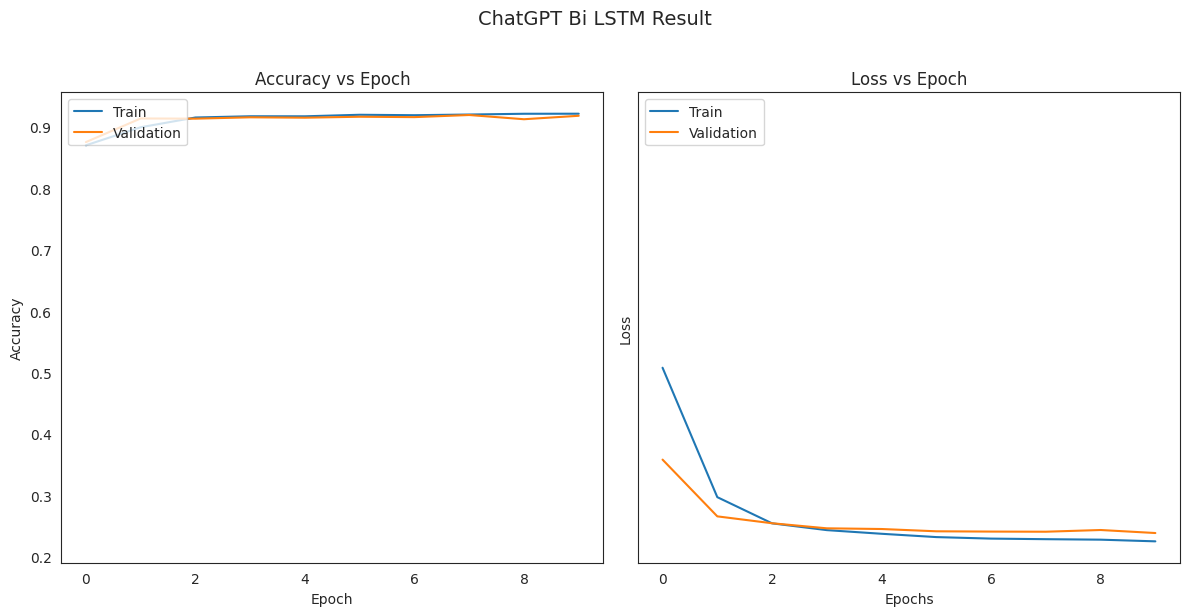

In [50]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(1,2, figsize = (12,6), sharey = True)

# accuracy
axs[0].plot(history_bi.history['accuracy'])
axs[0].plot(history_bi.history['val_accuracy'])
axs[0].set_title('Accuracy vs Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Validation'], loc = 'upper left')


# plot training and validaton of loss value
axs[1].plot(history_bi.history['loss'])
axs[1].plot(history_bi.history['val_loss'])
axs[1].set_title('Loss vs Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Validation'], loc = 'upper left')

plt.suptitle('ChatGPT Bi LSTM Result', y = 1.02, fontsize = 14)
fig.tight_layout()
#plt.savefig('chatgpt_bi_lstm_result.png', dpi = 300)
#files.download('chatgpt_bi_lstm_result.png')
plt.show()

In [51]:
loss, acc = model_bi.evaluate(X_test, y_test)
print(f"Loss: {loss:.2f}")
print(f"Accuracy: {acc:.2f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9197 - loss: 0.2338
Loss: 0.24
Accuracy: 0.92


## Aspect Identification
---

Develop a method to identify potential aspects (e.g., "quality", "performance", "features") within the review text.

Reasoning: To identify potential aspects, I will use TF-IDF to find important terms and then filter for nouns as potential aspects. I will also use NLTK for part-of-speech tagging to identify nouns.

In [ ]:
# Aspect Identification

import nltk
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
import numpy as np

# Download neccessary NLTK data
nltk.download('averaged_perceptron_tagger_eng')

# function to extract nouns from text
def extract_nouns(text):
  tokens = word_tokenize(text)
  tagged_tok = pos_tag(tokens)
  nouns = [word for word, pos in tagged_tok if pos.startswith('NN')]
  return nouns

# Apply the function to the 'clean text' column
sent_data['nouns'] = sent_data['clean_adv'].apply(extract_nouns)

# Flatten the list of lists into a single list of all nouns
all_nouns = [noun for sublist in sent_data['nouns'] for noun in sublist]

# calculate frequency distribution of nouns
fdist_nouns = FreqDist(all_nouns)

# Get the most common nouns as a potential aspects
potential_aspects = [word for word, freq in fdist_nouns.most_common(10)]

print('Potential Aspects: ')
print(potential_aspects)

In [ ]:
# Calculate TF IDF scores for the cleaned text
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent_data['clean_adv'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf_vectorizer.get_feature_names_out())

# get the features name (terms) from TF IDF vectorizer
tfidf_terms = tfidf_vectorizer.get_feature_names_out()

# Filter TF IDF terms to keep only those that are also identify as potential aspects (nouns)
aspect_tfidf_scores = tfidf_df[tfidf_terms[np.isin(tfidf_terms, potential_aspects)]]

# Calculate the mean TF IDF score for each potential aspects across all documents
mean_tfidf_scores = aspect_tfidf_scores.mean().sort_values(ascending = False)

print('\nPotential aspects ranked by mean TF IDF scores:')
print(mean_tfidf_scores.head(10))

# Refine the list of potential aspects based on a threshold or top N
# For this example, let's consider the top 20 aspects based on mean TF-IDF score
refined_potential_aspects = mean_tfidf_scores.head(20).index.tolist()

print("\nRefined list of potential aspects:")
print(refined_potential_aspects)

# Model Selection, Development, and Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets

svm_model = SVC(kernel='linear', C=1.0)

train = tfidf_df[refined_potential_aspects]
test = sent_data['sentiment'].map({'positive':1, 'neutral':0, 'negative':0}).values

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
acc, class_report = accuracy_score(y_test, y_pred), classification_report(y_test, y_pred)
print(f'Accuracy: {acc}')
print(class_report)

In [ ]:
# Try to predict once more by using Oversampling model\
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_smote, y_smote = smote.fit_resample(train, test)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(x_smote, y_smote, random_state = 42)

svm_model.fit(X_train_over, y_train_over)
y_pred = svm_model.predict(X_test_over)
acc, class_report = accuracy_score(y_test_over, y_pred), classification_report(y_test_over, y_pred)
print(class_report)

In [ ]:
# Try another model (Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_over, y_train_over)
y_pred = rf_model.predict(X_test_over)
acc, class_report = accuracy_score(y_test_over, y_pred), classification_report(y_test_over, y_pred)
print(f'Accuracy: {acc}')
print('Classification Report:')
print(class_report)

In [ ]:
# catboost model
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, class_weights = {0:1, 1:0.35})
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
model_report = classification_report(y_test, y_pred)
print(model_report)

The accuracy of both models is lower. The provisional diagnoses of this problem are:

- Loss of Sentiment Signal: Removing emojis and potentially some stop words might be discarding valuable cues about the sentiment of a review.

- Ignoring Word Order and Context: TF-IDF's inability to capture word order means the model can't distinguish between nuanced expressions of sentiment or negations. "Not good" and "good" would have similar representations in a simple TF-IDF.

- Limited Feature Set: Using only the TF-IDF scores of a small list of "refined potential aspects" as features (`tfidf_df[refined_potential_aspects]`) is a very restricted input for the model. The model is only seeing the presence and importance of these specific words, not the full context of the review. This is likely the most significant factor contributing to the low accuracy. The model needs more information from the text to make accurate sentiment predictions.

The solution to this problem:

- Revisiting Preprocessing: Be more selective about removing emojis or certain stop words if they are relevant to sentiment.

- Using More Advanced Feature Engineering: Explore techniques that capture word order and context,such as

  - **N-grams** include pairs or triplets of words (bigrams or trigrams) in your TF-IDF to capture simple phrases like "not good".
  - **Word Embedding** (e.g. word2vec or FaxText trained on Indonesian text) or contextual embeddings (like BERT) to represent words or sentences in a way that captures semantic meaning and context.

- Using the Full TF-IDF Matrix: Instead of filtering down to a small set of aspect terms, try training your model on the full TF-IDF matrix (or a dimensionality-reduced version of it). This will give the model access to information from all the words in the vocabulary.

- Exploring Different Models: While you've tried SVM and Random Forest, models specifically designed for sequential data like text (such as LSTMs or Transformers) often perform better on complex NLP tasks like sentiment analysis.